In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
color_list =["#3eb991","#e9a820","#e01563","#edb196","#6ecadc","#1f94ac","#ae9a6a","#ccb8a6","#343a44"]


# Graphing definition

In [260]:
def graph_df(data_frame:pd.DataFrame,begin_index=0,end_index=None):
    if end_index:
        column_name =list(data_frame.columns )[begin_index:end_index]
    else:
        column_name =list(data_frame.columns )[begin_index:]
    fig, ax = plt.subplots()
    x = np.arange(0, len(data_frame), step=1)

    for i in range(len(column_name)):
        label = column_name[i]
        #ax.scatter(x,test_output[label],color = color_list[i])
        ax.plot(x,data_frame[label],color = color_list[i])
        
    colorlist = zip(column_name,color_list)
    handles = [mpatches.Patch(color=colour, label=column_name) for label, colour in colorlist]
    t = ",".join(column_name)
    plt.legend(handles, column_name, ncol=1, bbox_to_anchor=(1, 1))
    plt.plot()
    ax.set_title(t)
    plt.tight_layout()

# Graphing Propogation

,V,K_I,Na_I,L_I
0,0.000000,4.955710e-07,-0.001126,-3.18000
1,0.318113,8.143670e-06,-0.009183,-3.08457
2,0.627487,4.226380e-05,-0.025860,-2.99175
3,0.929244,1.367080e-04,-0.049117,-2.90123
4,1.224260,3.410880e-04,-0.077067,-2.81272
...,...,...,...,...
97,-6.657580,4.102690e+00,-0.080088,-5.17727
98,-6.542110,4.071270e+00,-0.084447,-5.14263
99,-6.426530,4.040660e+00,-0.089014,-5.10796
100,-6.310900,4.010870e+00,-0.093795,-5.07327


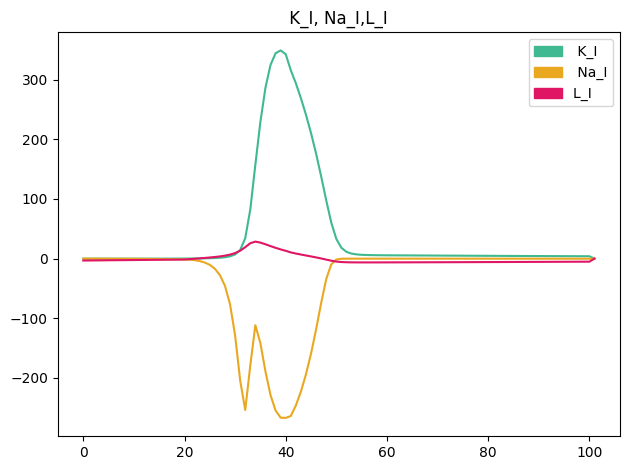

In [261]:
propogate_ap_df = pd.DataFrame(pd.read_csv("../data_files/propogate_output.csv"))
display(propogate_ap_df)
graph_df(propogate_ap_df,1,len(propogate_ap_df))

# Graph reduction

,V0
0,-0.300000
1,-0.055000
2,0.009696
3,0.057669
4,0.099634
...,...
2998,1.045040
2999,1.044920
3000,1.044810
3001,1.044700


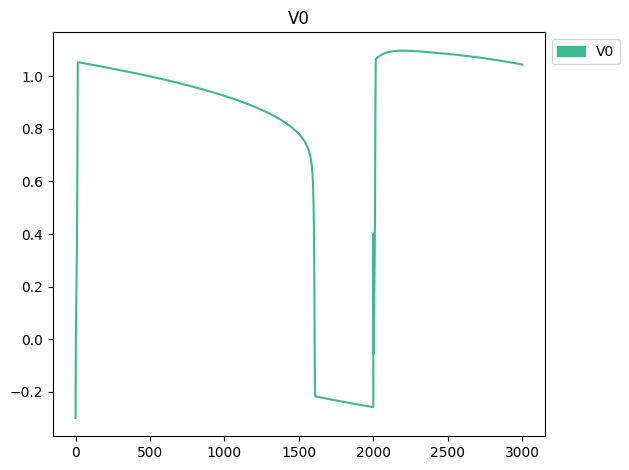

In [262]:
reduce_df = pd.DataFrame(pd.read_csv("../data_files/reduced_V_output.csv"))
display(reduce_df)
graph_df(reduce_df)##if u want to graph the full graph u have to do this

# Graph nullcline ( with tiny_N)

In [263]:
def graph_null(data_frame:pd.DataFrame,var_name,begin_x,end_x,step):
    column_name =[var_name]
    fig, ax = plt.subplots()
    x = np.arange(begin_x, end_x, step=step)

    for i in range(len(column_name)):
        label = column_name[i]
        #ax.scatter(x,test_output[label],color = color_list[i])
        y = data_frame[label].dropna() 
        ax.plot(x,y,color = color_list[i])
        
    colorlist = zip(column_name,color_list)
    handles = [mpatches.Patch(color=colour, label=column_name) for label, colour in colorlist]
    t = ",".join(column_name)
    plt.legend(handles, column_name, ncol=1, bbox_to_anchor=(1, 1))
    plt.plot()
    ax.set_title(t)
    plt.tight_layout()

In [264]:
null_df = pd.DataFrame(pd.read_csv("../data_files/reduced_null_output.csv"))
display(null_df)

,N,V,N_dv_0,V_dv_0,N_dn_0,V_dn_0
0,-0.050000,-0.150000,0.055,-0.15,-0.050,-0.15
1,-0.050000,-0.039625,0.060,-0.15,-0.045,-0.14
2,-0.050000,0.020146,0.065,-0.15,-0.045,-0.13
3,-0.049999,0.066396,0.070,-0.15,-0.040,-0.13
4,-0.049997,0.107814,0.045,-0.14,-0.040,-0.12
...,...,...,...,...,...,...
5997,0.147678,NaN,NaN,NaN,NaN,NaN
5998,0.147711,NaN,NaN,NaN,NaN,NaN
5999,0.147744,NaN,NaN,NaN,NaN,NaN
6000,0.147778,NaN,NaN,NaN,NaN,NaN


6002


ValueError: x and y must have same first dimension, but have shapes (14002,) and (6002,)

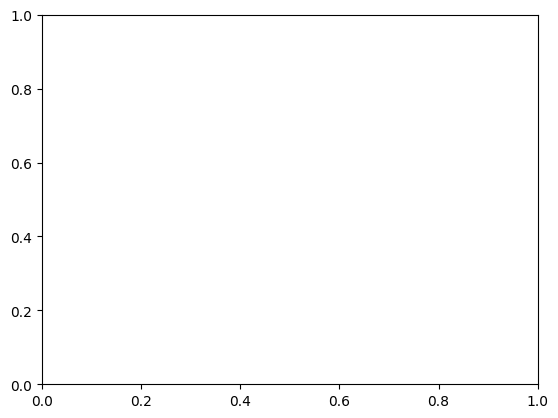

In [265]:
fig, ax = plt.subplots()
x1 = np.arange(-0.3,1.1002,step=0.0001)

label= column_name= ["N","V","tiny_N"]
y1 = null_df["N"].dropna()
print(len(y1))
ax.plot(x1,y1,color = color_list[0])## graphed the N plot

x2 =  null_df["V"].dropna()
y2=  np.arange(-0.05,0.15+0.0001,step=0.0001)
ax.plot(x2,y2,color = color_list[1])## graphed the V plot


"""x3 = np.arange( -0.3,0.5+0.000002,step=0.000001)
y3 = null_df["tiny_N"].dropna()"""
ax.plot(x3,y3,color = color_list[2])## graphed the V plot

colorlist = zip(column_name,color_list)
handles = [mpatches.Patch(color=colour, label=column_name) for label, colour in colorlist]
t = ",".join(column_name)
plt.legend(handles, column_name, ncol=1, bbox_to_anchor=(1, 1))
plt.plot()
ax.set_title(t)
plt.tight_layout()

# Graph nullcline 

In [ ]:
null_df = pd.DataFrame(pd.read_csv("../data_files/reduced_null_output.csv"))
display(null_df)

,N,V,N_dv_0,V_dv_0,N_dn_0,V_dn_0
0,-0.050000,-0.150000,0.055,-0.15,-0.050,-0.15
1,-0.050000,-0.039625,0.060,-0.15,-0.045,-0.14
2,-0.050000,0.020146,0.065,-0.15,-0.045,-0.13
3,-0.049999,0.066396,0.070,-0.15,-0.040,-0.13
4,-0.049997,0.107814,0.045,-0.14,-0.040,-0.12
...,...,...,...,...,...,...
5997,0.147678,NaN,NaN,NaN,NaN,NaN
5998,0.147711,NaN,NaN,NaN,NaN,NaN
5999,0.147744,NaN,NaN,NaN,NaN,NaN
6000,0.147778,NaN,NaN,NaN,NaN,NaN


6002


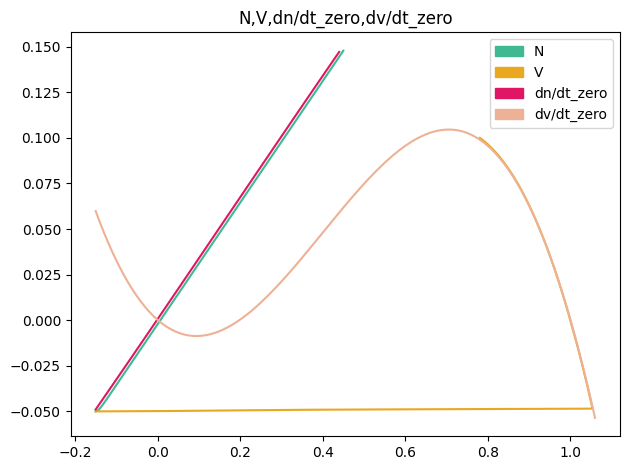

In [271]:
fig, ax = plt.subplots()
x1 = np.arange(-0.15,0.4502,step=0.0001)

label= column_name= ["N","V","dn/dt_zero","dv/dt_zero"]
y1 = null_df["N"].dropna()
print(len(y1))
ax.plot(x1,y1,color = color_list[0])## graphed the N plot

x2 =  null_df["V"].dropna()
y2=  np.arange(-0.05,0.10+0.0001,step=0.0001)
ax.plot(x2,y2,color = color_list[1])## graphed the V plot

x3 =  null_df["V_dn_0"].dropna()
y3 = null_df["N_dn_0"].dropna()

y3_pred = np.polyfit(x3, y3, deg=3)
ax.plot(x3,np.polyval(y3_pred, x3),color = color_list[2]) 

x4 =  null_df["V_dv_0"].dropna()
y4 = null_df["N_dv_0"].dropna()
y4_pred =  np.polyfit(x4, y4, deg=3)
ax.plot(x4,np.polyval(y4_pred, x4),color = color_list[3]) 

colorlist = zip(column_name,color_list)
handles = [mpatches.Patch(color=colour, label=column_name) for label, colour in colorlist]
t = ",".join(column_name)
plt.legend(handles, column_name, ncol=1, bbox_to_anchor=(1, 1))
plt.plot()
ax.set_title(t)
plt.tight_layout()

(485,)


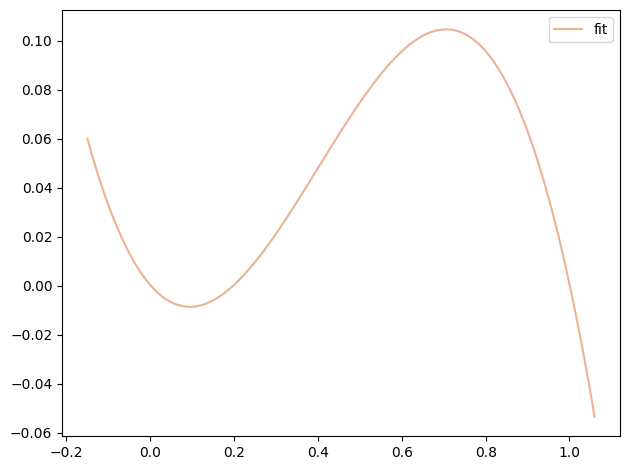

In [267]:
fig, ax = plt.subplots()
x3 = null_df["V_dv_0"].dropna().to_numpy() 
y3 =  null_df["N_dv_0"].dropna().to_numpy()

y3_pred = np.polyfit(x3, y3, deg=3)
ax.plot(x3,np.polyval(y3_pred, x3),color = color_list[3], label='fit') 
#ax.plot(x3,y3,color = color_list[2],label='og graph')## graphed the V plot






ax.legend()
plt.plot()
plt.tight_layout()